Silhouette Score: 0.9224671172731471


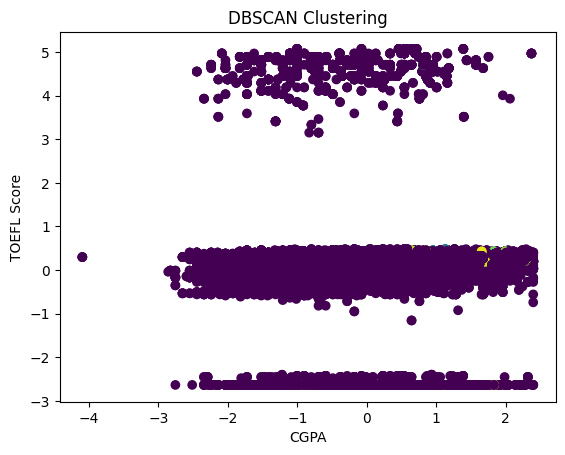

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# Standardize numerical features
scaler = StandardScaler()
dfe = pd.read_csv("data_preprocessed.csv")
df_scaled = pd.DataFrame(scaler.fit_transform(dfe), columns=dfe.columns)
# Parameters
eps = 0.1
min_samples = 4

# DBSCAN Application
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dfe['cluster'] = dbscan.fit_predict(df_scaled)

# Filter out noise samples for silhouette score calculation
silhouette_avg = silhouette_score(df_scaled[dfe['cluster'] != -1], dfe['cluster'][dfe['cluster'] != -1])
print(f'Silhouette Score: {silhouette_avg}')

# Scatter Plot
plt.scatter(df_scaled['CGPA'], df_scaled['TOEFL Score'], c=dfe['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.show()


**Close to +1:**
  object is well matched to its own cluster and poorly matched to neighboring clusters. It indicates a good clustering.

**Around 0:**
  object could be on or very close to the decision boundary between two neighboring clusters.

**Close to -1:**
  object is poorly matched to its own cluster and well matched to neighboring clusters. It indicates that the object may be in the wrong cluster.